<a href="https://colab.research.google.com/github/mffajardor/Alura_EsenciaCliente/blob/main/Challenge_2_Esencia_del_Cliente_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Revelando la Esencia del Cliente - Parte 2

# 1.Configuración del Ambiente

En esta etapa inicial, nuestro enfoque es preparar el entorno de trabajo. Utilizaremos Google Colab, donde conectaremos nuestro espacio de trabajo con Google Drive para un acceso fácil y seguro a los datos, así como realizar de forma inicial la importación de las librerias para ciencia de datos como Pandas, Matplotlib, Seaborn, Scikit-learn, entre otras. Este paso es crucial para garantizar que nuestro proyecto se desarrolle sin inconvenientes técnicos.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

In [ ]:
# Versiones de los programas

print(f'matplotlib => {matplotlib.__version__}')
print(f'pandas => {pd.__version__}')
print(f'numpy => {np.__version__}')
print(f'seaborn => {sns.__version__}')
print(f'sklearn => {sklearn.__version__}')

matplotlib => 3.7.1
pandas => 1.5.3
numpy => 1.23.5
seaborn => 0.13.1
sklearn => 1.2.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.Obtención y Transformación de los datos

Esta sección se centra en la preparación y transformación de los datos para el análisis posterior. El proceso se divide en varias etapas clave:

### 2.1 Obtención del dataset inicial

Primero, necesitamos cargar los datos en nuestro entorno de Jupyter. Esto se puede hacer de dos maneras:


*   **Opción 1:** Cargar un archivo .csv previamente generado y almacenado en Google Drive. Para esto, utilizamos la biblioteca pandas.

*    **Opción 2:** Descargar un dataset sugerido, que incluye un atributo adicional ingreso_real. Este representa el salario anual exacto de los clientes.

En este caso tomamos la Opción 1, ya que en la parte 1 se trabaja su procesamiento


In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/mffajardor@correo.udistrital.edu.co 2023-11-27 20:31/Alura Bootcamp/Challenge/media prediction_translated.csv', sep =',')
datos.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        60428 non-null 

In [ ]:
datos.describe()

,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),total_de_hijos,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox).1,precio_recomendado,peso_bruto,...,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,costo
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,58312.371748,0.829351,2.200271,2.115258,13.806433,...,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,36093.954105,1.303424,1.109644,0.932829,4.622693,...,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,20000.000000,0.000000,0.000000,0.500000,6.000000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,40000.000000,0.000000,1.000000,1.410000,9.700000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,40000.000000,0.000000,2.000000,2.130000,13.600000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,80000.000000,1.000000,3.000000,2.790000,17.700000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,160000.000000,5.000000,4.000000,3.980000,21.900000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [ ]:
# Verificar valores faltantes
print(datos.isnull().sum())

categoria_alimento               0
departamento                     0
tipo                             0
ventas_tienda(en millones)       0
costo_tienda(en millones)        0
ventas_unitarias(en millones)    0
promocion                        0
pais                             0
estado_civil                     0
genero                           0
total_de_hijos                   0
escolaridad                      0
miembro                          0
ocupacion                        0
vivienda_propia                  0
promedio_autos(aprox)            0
ingreso_anual                    0
numero_hijos                     0
promedio_autos(aprox).1          0
marca                            0
precio_recomendado               0
peso_bruto                       0
peso_neto                        0
empaque_reciclable               0
bajo_en_grasa                    0
unidades_por_caja                0
comercio                         0
ciudad                           0
estado              

In [ ]:
# Identificar columnas categóricas
categorical_columns = list(datos.select_dtypes(include=['object']).columns)
categorical_columns

['categoria_alimento',
 'departamento',
 'tipo',
 'promocion',
 'pais',
 'estado_civil',
 'genero',
 'escolaridad',
 'miembro',
 'ocupacion',
 'vivienda_propia',
 'marca',
 'comercio',
 'ciudad',
 'estado',
 'divulgacion']

### 2.2 Transformaciones y Selección de Atributos

Una vez obtenido el dataset, procedemos a realizar las siguientes transformaciones y selecciones:

*   **Exclusión de Columnas no Deseadas:** Eliminamos la columna objetivo 'miembro' de la lista de columnas categóricas.

*   **Selección de Columnas Relevantes:** Elegimos un conjunto de columnas que consideramos importantes para nuestro modelo. Estas incluyen atributos como categoria_alimento, departamento, tipo, ventas_tienda, entre otros.

*   **Codificación de Variables Categóricas:** Convertimos las variables categóricas a numéricas utilizando pd.get_dummies. Este paso es crucial para el análisis posterior.




In [ ]:
# Excluir la columna objetivo 'miembro' si está en la lista
categorical_columns.remove('miembro')
categorical_columns

['categoria_alimento',
 'departamento',
 'tipo',
 'promocion',
 'pais',
 'estado_civil',
 'genero',
 'escolaridad',
 'ocupacion',
 'vivienda_propia',
 'marca',
 'comercio',
 'ciudad',
 'estado',
 'divulgacion']

In [ ]:
# Seleccionar columnas relevantes para la clusterización
selected_columns = [
    "categoria_alimento", "departamento", "tipo", "ventas_tienda(en millones)",
    "costo_tienda(en millones)", "ventas_unitarias(en millones)", "promocion",
    "pais", "estado_civil", "genero", "total_de_hijos", "ingreso_anual", "costo",
    "escolaridad","ocupacion"
]

# Creamos un nuevo DataFrame con las columnas seleccionadas corregidas
df_relevant = datos[selected_columns].copy()

# Convertimos variables categóricas a numéricas usando pd.get_dummies
df_encoded = pd.get_dummies(df_relevant, drop_first=True)
df_encoded

,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),total_de_hijos,ingreso_anual,costo,categoria_alimento_Alimentos para el desayuno,categoria_alimento_Alimentos para picar,categoria_alimento_Alimentos ricos en almidón,categoria_alimento_Almejas enlatadas,...,estado_civil_Soltero,genero_Masculino,escolaridad_Primaria,escolaridad_Secundaria,escolaridad_Superior,escolaridad_Técnico,ocupacion_Gestión,ocupacion_Obrero,ocupacion_Profesional,ocupacion_Técnico
0,7.36,2.7232,4.0,1.0,20000,126.62,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,5.52,2.5944,3.0,0.0,60000,59.86,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,3.68,1.3616,2.0,4.0,20000,84.16,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3,3.68,1.1776,2.0,2.0,40000,95.78,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,4.08,1.4280,3.0,0.0,40000,50.79,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,2.76,1.3248,1.0,1.0,20000,95.25,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
60424,1.60,0.4960,1.0,2.0,40000,69.42,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
60425,5.52,2.5392,2.0,1.0,40000,67.51,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
60426,8.28,2.5668,3.0,2.0,80000,132.88,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0


In [ ]:
# Codificar variables nominales con pd.get_dummies()
data = pd.get_dummies(datos, columns=categorical_columns, drop_first=True)
data

,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),total_de_hijos,miembro,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox).1,precio_recomendado,...,"divulgacion_Daily Paper, Radio","divulgacion_Daily Paper, Radio, TV",divulgacion_In-Store Coupon,divulgacion_Product Attachment,divulgacion_Radio,divulgacion_Street Handout,divulgacion_Sunday Paper,"divulgacion_Sunday Paper, Radio","divulgacion_Sunday Paper, Radio, TV",divulgacion_TV
0,7.36,2.7232,4.0,1.0,Normal,1.0,20000,1.0,1.0,1.84,...,1,0,0,0,0,0,0,0,0,0
1,5.52,2.5944,3.0,0.0,Plata,4.0,60000,0.0,4.0,1.84,...,1,0,0,0,0,0,0,0,0,0
2,3.68,1.3616,2.0,4.0,Normal,1.0,20000,0.0,1.0,1.84,...,1,0,0,0,0,0,0,0,0,0
3,3.68,1.1776,2.0,2.0,Bronce,2.0,40000,2.0,2.0,1.84,...,0,0,1,0,0,0,0,0,0,0
4,4.08,1.4280,3.0,0.0,Bronce,2.0,40000,0.0,2.0,1.36,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,2.76,1.3248,1.0,1.0,Normal,1.0,20000,1.0,1.0,2.76,...,0,0,1,0,0,0,0,0,0,0
60424,1.60,0.4960,1.0,2.0,Bronce,2.0,40000,0.0,2.0,1.60,...,0,0,0,0,0,0,1,0,0,0
60425,5.52,2.5392,2.0,1.0,Bronce,3.0,40000,0.0,3.0,2.76,...,0,0,0,0,0,0,0,0,1,0
60426,8.28,2.5668,3.0,2.0,Bronce,4.0,80000,0.0,4.0,2.76,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
data.to_csv('/content/drive/MyDrive/mffajardor@correo.udistrital.edu.co 2023-11-27 20:31/Alura Bootcamp/Challenge/datase_Final_Challenge2.csv', index=False, sep =';', encoding='utf-8')

In [ ]:
# Ver la información del conjunto de datos y las primeras filas
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Columns: 305 entries, ventas_tienda(en millones) to divulgacion_TV
dtypes: float64(23), int64(1), object(1), uint8(280)
memory usage: 27.7+ MB
None
   ventas_tienda(en millones)  costo_tienda(en millones)  \
0                        7.36                     2.7232   
1                        5.52                     2.5944   
2                        3.68                     1.3616   
3                        3.68                     1.1776   
4                        4.08                     1.4280   

   ventas_unitarias(en millones)  total_de_hijos miembro  \
0                            4.0             1.0  Normal   
1                            3.0             0.0   Plata   
2                            2.0             4.0  Normal   
3                            2.0             2.0  Bronce   
4                            3.0             0.0  Bronce   

   promedio_autos(aprox)  ingreso_anual  numero_hijos 

### 2.3 Dataset para el análisis

Finalmente, preparamos el dataset para el análisis:



*   Creamos un nuevo DataFrame df_relevant con las columnas seleccionadas.
*   Aplicamos pd.get_dummies para codificar las variables nominales.
*   Creamos una copia de df_encoded en la variable data y añadimos la columna 'miembro' a esta.

Con estas transformaciones, nuestro dataset está listo para ser utilizado en las siguientes fases del análisis.

In [ ]:
data = df_encoded.copy()
data['miembro'] = datos['miembro']
data

,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),total_de_hijos,ingreso_anual,costo,categoria_alimento_Alimentos para el desayuno,categoria_alimento_Alimentos para picar,categoria_alimento_Alimentos ricos en almidón,categoria_alimento_Almejas enlatadas,...,genero_Masculino,escolaridad_Primaria,escolaridad_Secundaria,escolaridad_Superior,escolaridad_Técnico,ocupacion_Gestión,ocupacion_Obrero,ocupacion_Profesional,ocupacion_Técnico,miembro
0,7.36,2.7232,4.0,1.0,20000,126.62,1,0,0,0,...,0,1,0,0,0,0,0,0,1,Normal
1,5.52,2.5944,3.0,0.0,60000,59.86,1,0,0,0,...,1,0,0,1,0,0,0,1,0,Plata
2,3.68,1.3616,2.0,4.0,20000,84.16,1,0,0,0,...,0,1,0,0,0,0,1,0,0,Normal
3,3.68,1.1776,2.0,2.0,40000,95.78,1,0,0,0,...,0,0,1,0,0,0,1,0,0,Bronce
4,4.08,1.4280,3.0,0.0,40000,50.79,1,0,0,0,...,1,1,0,0,0,0,0,0,1,Bronce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,2.76,1.3248,1.0,1.0,20000,95.25,0,0,0,0,...,0,1,0,0,0,0,0,0,1,Normal
60424,1.60,0.4960,1.0,2.0,40000,69.42,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Bronce
60425,5.52,2.5392,2.0,1.0,40000,67.51,0,0,0,0,...,1,0,1,0,0,0,1,0,0,Bronce
60426,8.28,2.5668,3.0,2.0,80000,132.88,0,0,0,0,...,1,0,0,1,0,0,0,1,0,Bronce


In [62]:
datos['miembro'].value_counts()

Bronce    33807
Normal    13867
Oro        7556
Plata      5198
Name: miembro, dtype: int64

In [ ]:
data.columns

Index(['ventas_tienda(en millones)', 'costo_tienda(en millones)',
       'ventas_unitarias(en millones)', 'total_de_hijos', 'ingreso_anual',
       'costo', 'categoria_alimento_Alimentos para el desayuno',
       'categoria_alimento_Alimentos para picar',
       'categoria_alimento_Alimentos ricos en almidón',
       'categoria_alimento_Almejas enlatadas',
       ...
       'genero_Masculino', 'escolaridad_Primaria', 'escolaridad_Secundaria',
       'escolaridad_Superior', 'escolaridad_Técnico', 'ocupacion_Gestión',
       'ocupacion_Obrero', 'ocupacion_Profesional', 'ocupacion_Técnico',
       'miembro'],
      dtype='object', length=133)

#  3.Exploración y selección de atributos

En esta fase, generaremos un mapa de calor para visualizar las correlaciones entre los diferentes atributos del dataset. Esto nos ayudará a identificar posibles relaciones interesantes o patrones.


Utilizando Matplotlib y Seaborn, generamos un mapa de calor para visualizar las correlaciones entre las variables. Este método nos permite identificar rápidamente las relaciones más significativas con nuestra variable objetivo, **miembro**. Este paso es vital, ya que destacar las variables más correlacionadas nos guía en la selección de atributos críticos para un modelo de clasificación efectivo y generalizable.



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Codificar la variable 'miembro' que es una variable ordinal
encoder = LabelEncoder()
data['miembro_encoded'] = encoder.fit_transform(datos['miembro'])

# Ahora 'miembro_encoded' es tu nueva variable objetivo y 'miembro' se puede descartar
data.drop('miembro', axis=1, inplace=True)
data

,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),total_de_hijos,ingreso_anual,costo,categoria_alimento_Alimentos para el desayuno,categoria_alimento_Alimentos para picar,categoria_alimento_Alimentos ricos en almidón,categoria_alimento_Almejas enlatadas,...,genero_Masculino,escolaridad_Primaria,escolaridad_Secundaria,escolaridad_Superior,escolaridad_Técnico,ocupacion_Gestión,ocupacion_Obrero,ocupacion_Profesional,ocupacion_Técnico,miembro_encoded
0,7.36,2.7232,4.0,1.0,20000,126.62,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1
1,5.52,2.5944,3.0,0.0,60000,59.86,1,0,0,0,...,1,0,0,1,0,0,0,1,0,3
2,3.68,1.3616,2.0,4.0,20000,84.16,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,3.68,1.1776,2.0,2.0,40000,95.78,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,4.08,1.4280,3.0,0.0,40000,50.79,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,2.76,1.3248,1.0,1.0,20000,95.25,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
60424,1.60,0.4960,1.0,2.0,40000,69.42,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
60425,5.52,2.5392,2.0,1.0,40000,67.51,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
60426,8.28,2.5668,3.0,2.0,80000,132.88,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

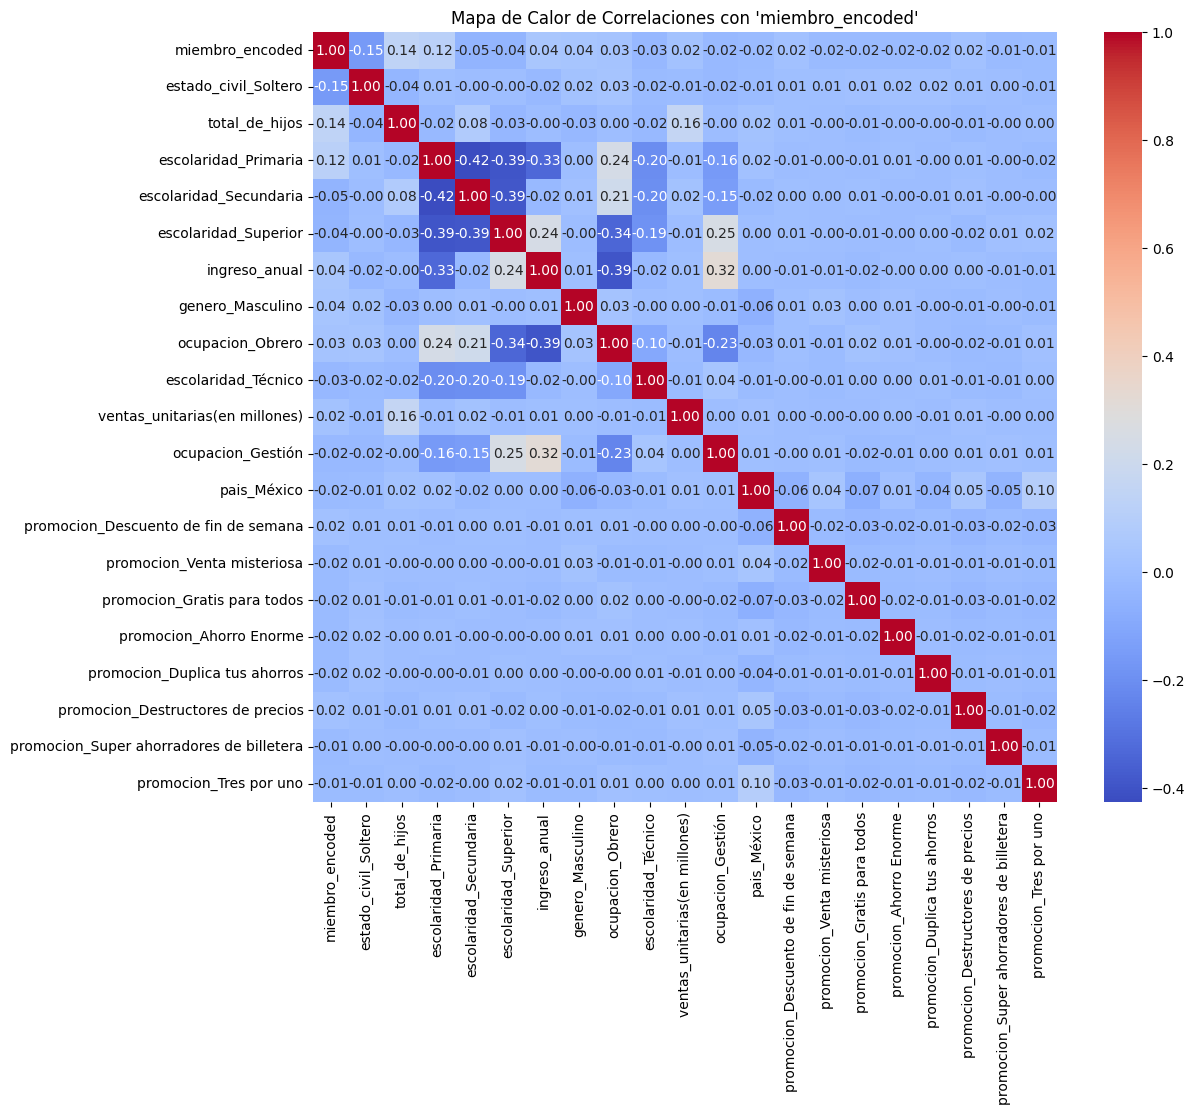

In [ ]:
# Calcular la matriz de correlación
corr_matrix = data.corr()

# Enfocar el mapa de calor en las 20 características más correlacionadas con 'miembro_encoded'
top_features = corr_matrix['miembro_encoded'].sort_values(key=abs, ascending=False).head(21).index

# Crear una nueva matriz de correlación que incluya solo las características más correlacionadas
top_corr_matrix = data[top_features].corr()

# Generar el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Mapa de Calor de Correlaciones con 'miembro_encoded'")
plt.show()

Del análisís, hay algunos puntos clave que podemos considerar a partir del mapa de calor y otros análisis previos:

El mapa de calor de correlaciones se ha restringido a las 20 variables más correlacionadas con nuestra variable objetivo, miembro_encoded, permitiendo centrar el enfoque en las características más relevantes para predecir la membresía, en detalles como:



*   **Estado Civil:** La variable estado_civil_Soltero muestra una correlación significativa con la membresía. Esto sugiere que el estado civil puede influir en la probabilidad de ser miembro, lo que podría ser una característica valiosa para nuestro modelo.

*   **Cantidad de Hijos:** total_de_hijos aparece como una variable influyente. Este hallazgo puede indicar que la cantidad de dependientes puede afectar la decisión de convertirse en miembro, lo que podría reflejar diferencias en el comportamiento de compra.

*   **Escolaridad:** Las diferentes categorías de escolaridad, como escolaridad_Primaria, escolaridad_Secundaria, y escolaridad_Superior tienen correlaciones diversas, lo que sugiere que el nivel educativo puede desempeñar un papel en la predicción de la membresía.


*   **Ingreso Anual:** La correlación con ingreso_anual es importante, ya que el poder adquisitivo puede ser un factor determinante en la decisión de ser miembro.

*   **Promociones:** Varios tipos de promociones, como promocion_Descuento de fin de semana y promocion_Venta misteriosa, muestran correlaciones con la membresía. Esto indica que la respuesta a ciertas promociones puede ser un indicador de la membresía.

*   **Ocupación:** Las correlaciones de las variables ocupacion_Gestión, ocupacion_Obrero, y otras categorías de ocupación con la membresía pueden proporcionar información sobre cómo la profesión de una persona influye en su probabilidad de ser miembro.













# 4.Segmentación de datos y Baseline

### 4.1. Selección de Features

Para construir un modelo robusto, iniciamos seleccionando atributos significativos. Esta selección se basa en la correlación positiva con nuestra variable objetivo. El mapa de calor previamente generado es una herramienta visual indispensable que nos ayuda a identificar al menos 10 atributos con fuerte correlación para incluir en nuestro modelo.

Con estos atributos en mano, procedemos a segmentar nuestros datos utilizando la función train_test_split() de Scikit-Learn. A fin de garantizar la consistencia y reproductibilidad de nuestros resultados, establecemos un random_state fijo y asignamos un 30% de los datos para el conjunto de prueba.

In [122]:
data_encoded = data.copy()
data_encoded

,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),total_de_hijos,ingreso_anual,costo,categoria_alimento_Alimentos para el desayuno,categoria_alimento_Alimentos para picar,categoria_alimento_Alimentos ricos en almidón,categoria_alimento_Almejas enlatadas,...,genero_Masculino,escolaridad_Primaria,escolaridad_Secundaria,escolaridad_Superior,escolaridad_Técnico,ocupacion_Gestión,ocupacion_Obrero,ocupacion_Profesional,ocupacion_Técnico,miembro_encoded
0,7.36,2.7232,4.0,1.0,20000,126.62,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1
1,5.52,2.5944,3.0,0.0,60000,59.86,1,0,0,0,...,1,0,0,1,0,0,0,1,0,3
2,3.68,1.3616,2.0,4.0,20000,84.16,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,3.68,1.1776,2.0,2.0,40000,95.78,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,4.08,1.4280,3.0,0.0,40000,50.79,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,2.76,1.3248,1.0,1.0,20000,95.25,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
60424,1.60,0.4960,1.0,2.0,40000,69.42,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
60425,5.52,2.5392,2.0,1.0,40000,67.51,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
60426,8.28,2.5668,3.0,2.0,80000,132.88,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [ ]:
data_encoded.to_csv('/content/drive/MyDrive/mffajardor@correo.udistrital.edu.co 2023-11-27 20:31/Alura Bootcamp/Challenge/datase_Final_Challenge2_resumido.csv', index=False, sep =';', encoding='utf-8')

In [ ]:
correlations = data_encoded.corr()['miembro_encoded'].sort_values(ascending=False)

# Seleccionar las 10 características más correlacionadas, excluyendo 'miembro_encoded'
top_features = correlations.index[1:11].tolist()
top_features

['total_de_hijos',
 'escolaridad_Primaria',
 'ingreso_anual',
 'genero_Masculino',
 'ocupacion_Obrero',
 'ventas_unitarias(en millones)',
 'promocion_Descuento de fin de semana',
 'promocion_Destructores de precios',
 'promocion_Ahorro de precios imbatible',
 'promocion_Rebajando precios']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
# Definir las variables independientes y la dependiente
X = data_encoded.drop('miembro_encoded', axis = 1)
y = data_encoded['miembro_encoded']

In [171]:
X

,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),total_de_hijos,ingreso_anual,costo,categoria_alimento_Alimentos para el desayuno,categoria_alimento_Alimentos para picar,categoria_alimento_Alimentos ricos en almidón,categoria_alimento_Almejas enlatadas,...,estado_civil_Soltero,genero_Masculino,escolaridad_Primaria,escolaridad_Secundaria,escolaridad_Superior,escolaridad_Técnico,ocupacion_Gestión,ocupacion_Obrero,ocupacion_Profesional,ocupacion_Técnico
0,7.36,2.7232,4.0,1.0,20000,126.62,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,5.52,2.5944,3.0,0.0,60000,59.86,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,3.68,1.3616,2.0,4.0,20000,84.16,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3,3.68,1.1776,2.0,2.0,40000,95.78,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,4.08,1.4280,3.0,0.0,40000,50.79,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,2.76,1.3248,1.0,1.0,20000,95.25,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
60424,1.60,0.4960,1.0,2.0,40000,69.42,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
60425,5.52,2.5392,2.0,1.0,40000,67.51,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
60426,8.28,2.5668,3.0,2.0,80000,132.88,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0


In [172]:
y

0        1
1        3
2        1
3        0
4        0
        ..
60423    1
60424    0
60425    0
60426    0
60427    1
Name: miembro_encoded, Length: 60428, dtype: int64

In [173]:
# Dividir el dataset en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 4.2. Baseline del Modelo

Como punto de partida en nuestro modelado, entrenamos un modelo de Árbol de Decisión sin ajustar hiperparámetros. Esto nos proporciona una línea base para evaluar el rendimiento inicial del modelo con respecto a nuestra tarea de clasificación multiclase.

In [174]:
# Instanciar el modelo de Árbol de Decisión
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [175]:
# Realizar predicciones en el conjunto de prueba
y_pred = decision_tree.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 3, 1])

### 4.3. Evaluación de Métricas

Desarrollamos una función que calcule y devuelva las métricas clave: accuracy_score, precision_score y recall_score. Estas métricas nos permiten juzgar la calidad de nuestro modelo desde diferentes ángulos, desde qué tan bien clasifica en general (exactitud), qué tan bien identifica una clase (precisión), hasta qué tan bien detecta casos positivos (sensibilidad).

El output de esta función es un informe estructurado que muestra estas métricas, facilitando una comparación clara y directa con futuras iteraciones y mejoras del modelo.

In [176]:
def imprimir_metricas(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    print(f'La Exactitud del modelo es: {accuracy:.2%}')
    print(f'La Precisión del modelo es: {precision:.2%}')
    print(f'La Sensitividad del modelo es: {recall:.2%}')

# Llamar a la función con las predicciones
imprimir_metricas(y_test, y_pred)

La Exactitud del modelo es: 91.63%
La Precisión del modelo es: 90.60%
La Sensitividad del modelo es: 87.53%


# 5.Modelado y Validación

### Ajuste de Modelo
Con un modelo base ya establecido, avanzamos hacia la optimización, ajustando los hiperparámetros y utilizando técnicas de validación cruzada para evaluar la robustez de nuestro modelo. El propósito es experimentar con distintos algoritmos de clasificación multiclase, incluyendo Árboles de Decisión, Máquinas de Soporte Vectorial (SVM) y Bosques Aleatorios, cada uno con su propio conjunto de hiperparámetros que requieren ajuste fino.

Nuestro objetivo es ambicioso: queremos que todas las métricas de rendimiento excedan el umbral del 90%. Este es un reto significativo que pone a prueba tanto la calidad de nuestros datos como nuestra habilidad para modelarlos eficientemente.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
def plot_confusion_matrix(y_test, y_pred, title):
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()

In [ ]:
def print_classification_report(y_test, y_pred):
    print(classification_report(y_test, y_pred))

def perform_cross_validation(model, X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits)
    cv_scores = cross_val_score(model, X, y, cv=skf, scoring='recall_macro')
    print(f'Cross-validated recall: {cv_scores.mean():.2%}')
    return cv_scores

def optimize_hyperparameters(model, param_distributions, X_train, y_train, n_iter=10, cv_folds=5, scoring_metric='recall_macro'):
    """
    Optimiza los hiperparámetros de un modelo dado utilizando RandomizedSearchCV.

    :param model: El modelo de clasificación a optimizar.
    :param param_distributions: El espacio de hiperparámetros a explorar.
    :param X_train: Las características de entrenamiento.
    :param y_train: Las etiquetas de entrenamiento.
    :param n_iter: El número de iteraciones de búsqueda de parámetros.
    :param cv_folds: El número de pliegues en la validación cruzada.
    :param scoring_metric: La métrica de evaluación para la optimización.
    :return: El mejor modelo encontrado y los mejores parámetros.
    """
    cv = StratifiedKFold(n_splits=cv_folds)
    scorer = make_scorer(recall_score, average=scoring_metric)
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions,
        n_iter=n_iter,
        cv=cv,
        scoring=scorer,
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_, random_search.best_params_


In [ ]:
def plot_roc_curve(y_test, y_scores):
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
from scipy import interp
from itertools import cycle

def plot_multiclass_roc_curve(y_test, y_score, n_classes, title):
    # Binarizar las etiquetas en un formato one-vs-all
    y_test_binarized = label_binarize(y_test, classes=range(n_classes))

    # Calcular ROC curve y ROC area para cada clase
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Calcular las curvas y áreas de ROC para cada clase
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calcular el "micro-average" de la ROC curve y ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Agregar curva ROC para el "micro-average"
    plt.figure(figsize=(8, 6))
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
             color='deeppink', linestyle=':', linewidth=4)

    # Calcular y agregar curva ROC para el "macro-average"
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    plt.plot(fpr["macro"], tpr["macro"],
             label=f'macro-average ROC curve (area = {roc_auc["macro"]:.2f})',
             color='navy', linestyle=':', linewidth=4)

    # Agregar curvas ROC para cada clase
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
def balance_and_train_model(X_train, y_train, model):
    smote = SMOTE(random_state=42)
    pipeline = make_pipeline(smote, model)
    pipeline.fit(X_train, y_train)
    return pipeline

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_metrics(y_true, y_pred, average='macro'):
    """
    Imprime la exactitud, precisión y sensibilidad para las predicciones de un modelo.

    :param y_true: Las etiquetas verdaderas.
    :param y_pred: Las etiquetas predichas por el modelo.
    :param average: El método de promediado para la precisión y la sensibilidad.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=average)
    recall = recall_score(y_true, y_pred, average=average)

    print(f'La Exactitud del modelo es: {accuracy:.2%}')
    print(f'La Precisión del modelo es: {precision:.2%}')
    print(f'La Sensitividad del modelo es: {recall:.2%}')

In [ ]:
from sklearn.metrics import roc_auc_score


def apply_models(model_params, X_train, y_train, X_test, y_test):
  #Antes de entrar al ciclo for, define 'n_classes' como el número de clases únicas
  n_classes = y.nunique()

  for model, params in models_params:
      # Optimize hyperparameters
      best_model, best_params = optimize_hyperparameters(model, params, X_train, y_train)
      print(f"{model.__class__.__name__} Mejores parámetros: {best_params}")

      # Fit the best model
      best_model.fit(X_train, y_train)

      # Make predictions
      y_pred = best_model.predict(X_test)

      # Print evaluation metrics
      print_metrics(y_test, y_pred)

      # Plot confusion matrix
      plot_confusion_matrix(y_test, y_pred, title=f'Confusion Matrix for {model.__class__.__name__}')

      # Check if the model has predict_proba method
      if hasattr(best_model, "predict_proba"):
          # Predict probabilities
          y_scores = best_model.predict_proba(X_test)

          # Calculate AUC score for each class and print it
          roc_auc = roc_auc_score(label_binarize(y_test, classes=range(n_classes)), y_scores, multi_class='ovr')
          print(f"{model.__class__.__name__} ROC AUC score: {roc_auc:.2%}")

          # Plot ROC curves for each class
          plot_multiclass_roc_curve(y_test, y_scores, n_classes, title=f'ROC Curve for {model.__class__.__name__}')
      else:
          print(f"{model.__class__.__name__} does not support probability predictions")

In [ ]:
# Asumiendo que 'X_train', 'X_test', 'y_train', 'y_test' ya están definidos.

# Actualiza tus params para incluir 'class_weight'
models_params = [
    (DecisionTreeClassifier(random_state=42, class_weight='balanced'),
     {'max_depth': range(20, 40, 5), 'min_samples_split': [2, 3, 4]}),

    (RandomForestClassifier(random_state=42, class_weight='balanced'),
     {'n_estimators': [150, 200, 250], 'max_depth': [18, 19, 20, 21, 22], 'min_samples_split': [2, 3, 4]})
]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


DecisionTreeClassifier Mejores parámetros: {'min_samples_split': 3, 'max_depth': 35}
La Exactitud del modelo es: 91.64%
La Precisión del modelo es: 88.06%
La Sensitividad del modelo es: 89.68%


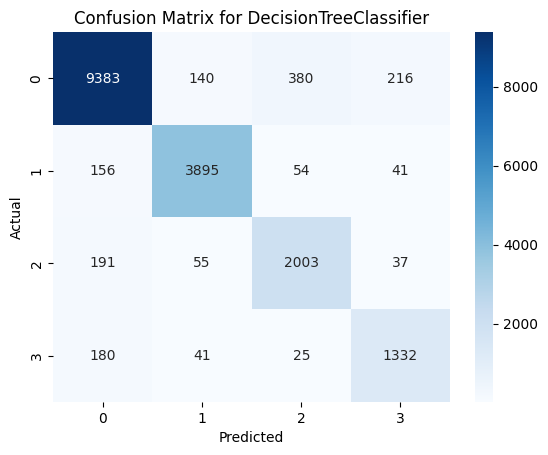

DecisionTreeClassifier ROC AUC score: 93.80%


<ipython-input-34-c2ea8d19f4a4>:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


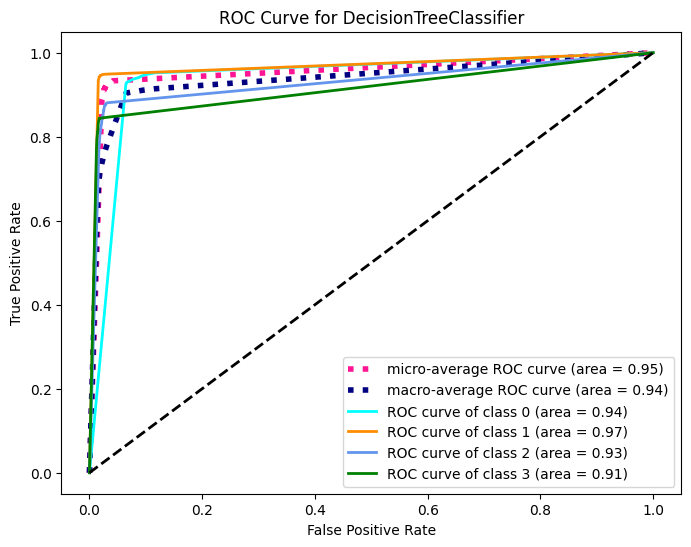

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomForestClassifier Mejores parámetros: {'n_estimators': 150, 'min_samples_split': 3, 'max_depth': 22}
La Exactitud del modelo es: 84.54%
La Precisión del modelo es: 82.88%
La Sensitividad del modelo es: 77.68%


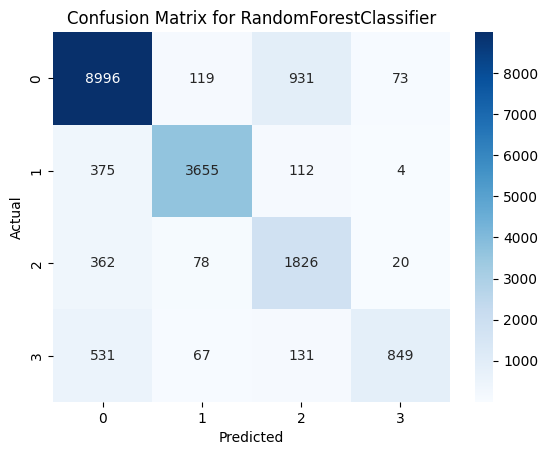

RandomForestClassifier ROC AUC score: 95.98%


<ipython-input-34-c2ea8d19f4a4>:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


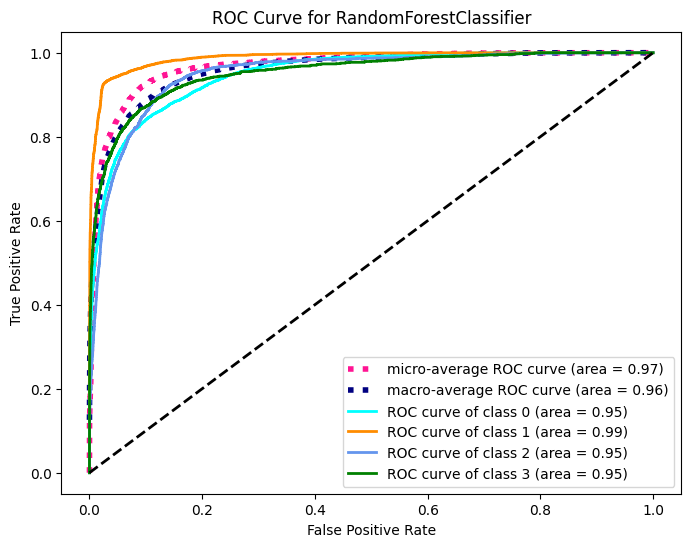

In [ ]:
apply_models(models_params, X_train, y_train, X_test, y_test)

## Ejecutar otras pruebas


In [ ]:
# Mala

models_params_3 = [
    # DecisionTreeClassifier con nuevos hiperparámetros ajustados
    (DecisionTreeClassifier(random_state=42, class_weight='balanced'), {
        'max_depth': [30, 35, None],  # Profundidades cerca de las previamente encontradas como óptimas
        'min_samples_split': [3, 4, 5],  # Valores cercanos al mejor encontrado
        'min_samples_leaf': [1, 2, 3],  # Añadir para controlar el sobreajuste
        'max_leaf_nodes': [None, 50, 100, 200],  # Limitar el número de nodos hoja
        'splitter': ['best', 'random']  # Probar divisiones aleatorias
    }),

    # RandomForestClassifier con nuevos hiperparámetros ajustados
    (RandomForestClassifier(random_state=42), {
        'n_estimators': [140, 150, 160],  # Valores cercanos al mejor encontrado
        'max_depth': [20, 22, 24],  # Profundidades cerca de las previamente encontradas como óptimas
        'min_samples_split': [2, 3, 4],  # Valores cercanos al mejor encontrado
        'max_features': ['sqrt', 0.5],  # 'sqrt' es equivalente a 'auto' y probamos también con la mitad de las características
        'bootstrap': [True],  # Habilitar el remuestreo de bootstrap
        'max_samples': [None, 0.9],  # Probar con el total de muestras y con el 90%
        'class_weight': ['balanced', 'balanced_subsample']  # Probar con ambos tipos de balanceo de clases
    })
]


models_params_3 = [
    # DecisionTreeClassifier con nuevos hiperparámetros ajustados
    (DecisionTreeClassifier(random_state=42, class_weight='balanced'), {
        'max_depth': [30, 35, None],  # Profundidades cerca de las previamente encontradas como óptimas
        'min_samples_split': [3, 4, 5],  # Valores cercanos al mejor encontrado
        'min_samples_leaf': [1, 2, 3],  # Añadir para controlar el sobreajuste
        'max_leaf_nodes': [None, 50, 100, 200],  # Limitar el número de nodos hoja
        'splitter': ['best', 'random']  # Probar divisiones aleatorias
    }),

    (DecisionTreeClassifier(random_state=42), {
        'max_depth': range(20,80,5),  # Profundidades cerca de las previamente encontradas como óptimas
        'min_samples_split': range(2,10,1),  # Valores cercanos al mejor encontrado
        'min_samples_leaf': range(6),  # Añadir para controlar el sobreajuste
        'max_leaf_nodes': range(50,400,25),  # Limitar el número de nodos hoja
        'splitter': ['best', 'random']  # Probar divisiones aleatorias
    }),

]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


DecisionTreeClassifier Mejores parámetros: {'min_samples_split': 3, 'max_depth': 35}
La Exactitud del modelo es: 91.64%
La Precisión del modelo es: 88.06%
La Sensitividad del modelo es: 89.68%


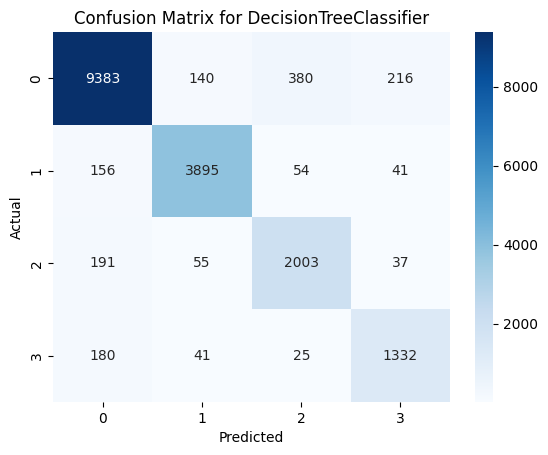

DecisionTreeClassifier ROC AUC score: 93.80%


<ipython-input-34-c2ea8d19f4a4>:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


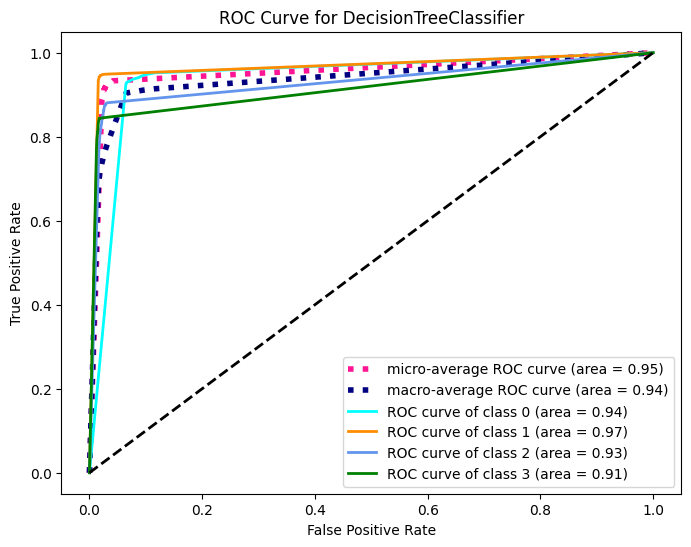

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomForestClassifier Mejores parámetros: {'n_estimators': 150, 'min_samples_split': 3, 'max_depth': 22}
La Exactitud del modelo es: 84.54%
La Precisión del modelo es: 82.88%
La Sensitividad del modelo es: 77.68%


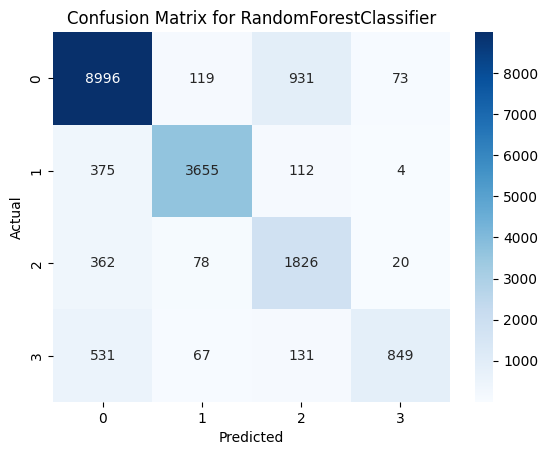

RandomForestClassifier ROC AUC score: 95.98%


<ipython-input-34-c2ea8d19f4a4>:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


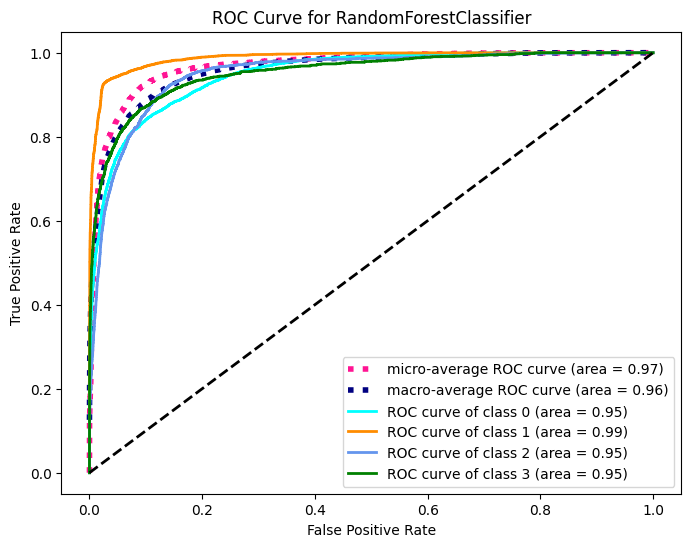

In [ ]:
apply_models(models_params_3, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

models_params_4 = [
    # DecisionTreeClassifier con hiperparámetros ajustados
    (DecisionTreeClassifier(random_state=42), {
        'max_depth': [10, 20, 30],  # Profundidades más conservadoras
        'min_samples_split': [50, 100, 200],  # Valores más altos para prevenir sobreajuste
        'min_samples_leaf': [25, 50, 75],  # Incrementar para mayor generalización
    }),

    # RandomForestClassifier con hiperparámetros ajustados
    (RandomForestClassifier(random_state=42), {
        'n_estimators': [100, 200, 300],  # Número de árboles
        'max_depth': [10, 15, 20],  # Profundidades más conservadoras
        'min_samples_split': [50, 100],  # Valores más altos para prevenir sobreajuste
        'min_samples_leaf': [25, 50],  # Incrementar para mayor generalización
    }),

    # GradientBoostingClassifier con parámetros por defecto para comenzar
    (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [50, 100],
        'min_samples_leaf': [25, 50],
    }),

    # XGBClassifier con parámetros por defecto para comenzar
    (XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.1, 0.2],
    }),
]


In [ ]:
models_params_4 = [
    # XGBClassifier con parámetros por defecto para comenzar
    (XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.1, 0.2],
    }),

    (DecisionTreeClassifier(random_state=42, class_weight='balanced'), {
        'max_depth': range(20,80,5),  # Profundidades cerca de las previamente encontradas como óptimas
        'min_samples_split': range(2,10,1),  # Valores cercanos al mejor encontrado
        'min_samples_leaf': range(6),  # Añadir para controlar el sobreajuste
        'max_leaf_nodes': range(50,400,25),  # Limitar el número de nodos hoja
        'splitter': ['best', 'random']  # Probar divisiones aleatorias
    }),

]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


DecisionTreeClassifier Mejores parámetros: {'min_samples_split': 3, 'max_depth': 35}
La Exactitud del modelo es: 91.64%
La Precisión del modelo es: 88.06%
La Sensitividad del modelo es: 89.68%


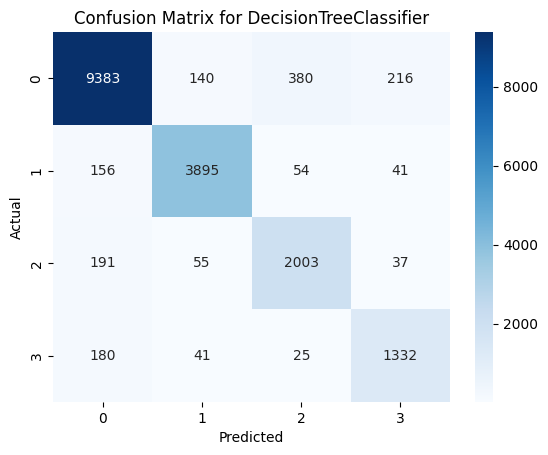

DecisionTreeClassifier ROC AUC score: 93.80%


<ipython-input-34-c2ea8d19f4a4>:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


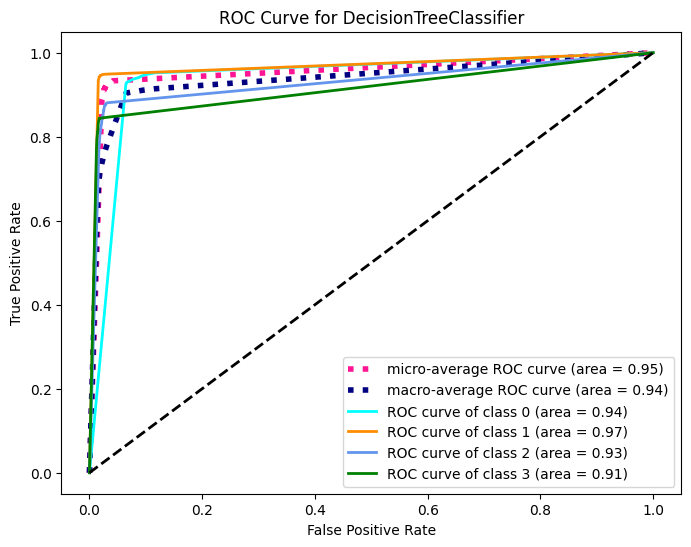

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomForestClassifier Mejores parámetros: {'n_estimators': 150, 'min_samples_split': 3, 'max_depth': 22}
La Exactitud del modelo es: 84.54%
La Precisión del modelo es: 82.88%
La Sensitividad del modelo es: 77.68%


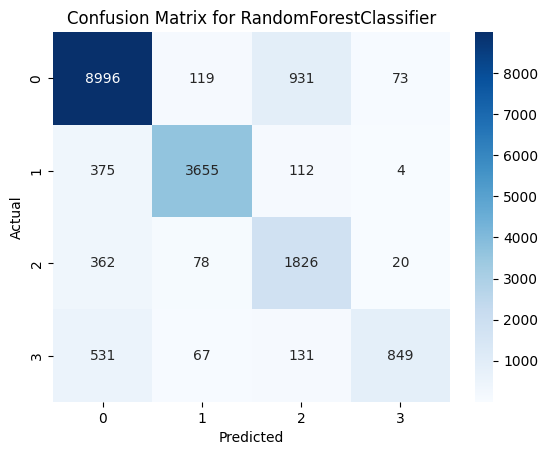

RandomForestClassifier ROC AUC score: 95.98%


<ipython-input-34-c2ea8d19f4a4>:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


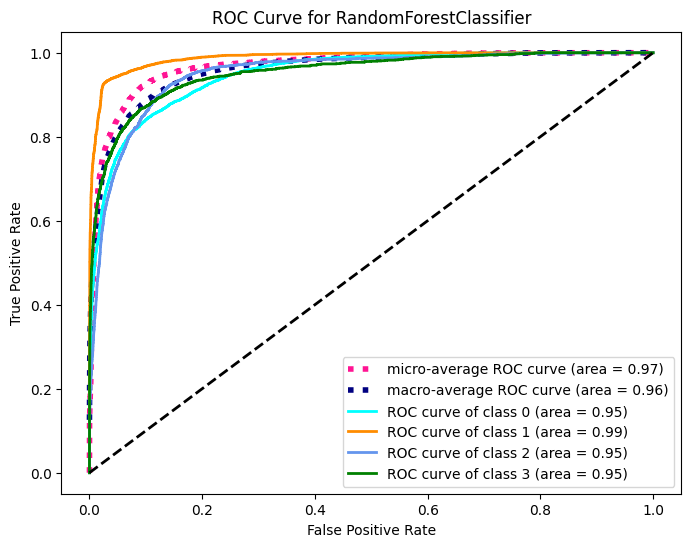

In [ ]:
apply_models(models_params_4, X_train, y_train, X_test, y_test)

# 6.Modelo para la clasificación de clientes

In [163]:
data_encoded = data.copy()
data_encoded

,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),total_de_hijos,ingreso_anual,costo,categoria_alimento_Alimentos para el desayuno,categoria_alimento_Alimentos para picar,categoria_alimento_Alimentos ricos en almidón,categoria_alimento_Almejas enlatadas,...,genero_Masculino,escolaridad_Primaria,escolaridad_Secundaria,escolaridad_Superior,escolaridad_Técnico,ocupacion_Gestión,ocupacion_Obrero,ocupacion_Profesional,ocupacion_Técnico,miembro_encoded
0,7.36,2.7232,4.0,1.0,20000,126.62,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1
1,5.52,2.5944,3.0,0.0,60000,59.86,1,0,0,0,...,1,0,0,1,0,0,0,1,0,3
2,3.68,1.3616,2.0,4.0,20000,84.16,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,3.68,1.1776,2.0,2.0,40000,95.78,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,4.08,1.4280,3.0,0.0,40000,50.79,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,2.76,1.3248,1.0,1.0,20000,95.25,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
60424,1.60,0.4960,1.0,2.0,40000,69.42,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
60425,5.52,2.5392,2.0,1.0,40000,67.51,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
60426,8.28,2.5668,3.0,2.0,80000,132.88,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [164]:
data_original = data_encoded.copy()
data_original

,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),total_de_hijos,ingreso_anual,costo,categoria_alimento_Alimentos para el desayuno,categoria_alimento_Alimentos para picar,categoria_alimento_Alimentos ricos en almidón,categoria_alimento_Almejas enlatadas,...,genero_Masculino,escolaridad_Primaria,escolaridad_Secundaria,escolaridad_Superior,escolaridad_Técnico,ocupacion_Gestión,ocupacion_Obrero,ocupacion_Profesional,ocupacion_Técnico,miembro_encoded
0,7.36,2.7232,4.0,1.0,20000,126.62,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1
1,5.52,2.5944,3.0,0.0,60000,59.86,1,0,0,0,...,1,0,0,1,0,0,0,1,0,3
2,3.68,1.3616,2.0,4.0,20000,84.16,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,3.68,1.1776,2.0,2.0,40000,95.78,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,4.08,1.4280,3.0,0.0,40000,50.79,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,2.76,1.3248,1.0,1.0,20000,95.25,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
60424,1.60,0.4960,1.0,2.0,40000,69.42,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
60425,5.52,2.5392,2.0,1.0,40000,67.51,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
60426,8.28,2.5668,3.0,2.0,80000,132.88,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [165]:
from sklearn.tree import DecisionTreeClassifier

# Entrenar el modelo
modelo_optimizado = DecisionTreeClassifier(min_samples_split=3, max_depth=35, class_weight='balanced', random_state=42)
modelo_optimizado.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=35,
                       min_samples_split=3, random_state=42)

In [166]:
# Filtrar las filas donde 'miembro_encoded' es 0 (Normal) para la predicción
data_para_prediccion = data_encoded[data_encoded['miembro_encoded'] == 0]

In [167]:
# Predecir las membresías
X_para_prediccion = data_para_prediccion.drop('miembro_encoded', axis=1)

# Predecir las membresías para esas filas
predicciones = modelo_optimizado.predict(X_para_prediccion)

In [168]:
# Actualizar la columna 'miembro_encoded' en el DataFrame original con las nuevas predicciones
data_encoded.loc[data_encoded['miembro_encoded'] == 0, 'miembro_encoded'] = predicciones


In [169]:
# Ahora puedes aplicar el mapeo para convertir los valores numéricos a las categorías nominales
# Crear un diccionario que mapee los valores numéricos a las categorías nominales
mapeo_membresia = {
    0: 'Normal',
    1: 'Bronce',
    2: 'Plata',
    3: 'Oro'
}

data_encoded['categoria_membresia'] = data_encoded['miembro_encoded'].map(mapeo_membresia)

In [170]:
# Verificar la distribución de las nuevas membresías
print(data_encoded['categoria_membresia'].value_counts())

Normal    33128
Bronce    13851
Plata      8047
Oro        5402
Name: categoria_membresia, dtype: int64


In [161]:
print(data_original['categoria_membresia'].value_counts())

Normal    33128
Bronce    13851
Plata      8047
Oro        5402
Name: categoria_membresia, dtype: int64


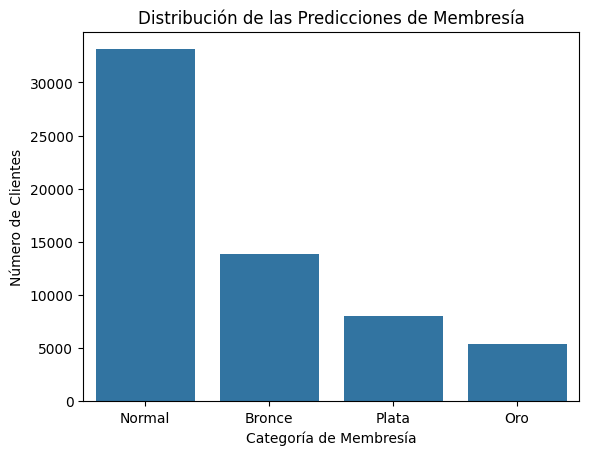

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de predicciones
conteo_predicciones = data_encoded['miembro_encoded'].value_counts()

# Gráfico de barras
sns.barplot(x=conteo_predicciones.index, y=conteo_predicciones.values)
plt.xlabel('Categoría de Membresía')
plt.ylabel('Número de Clientes')
plt.title('Distribución de las Predicciones de Membresía')
plt.show()


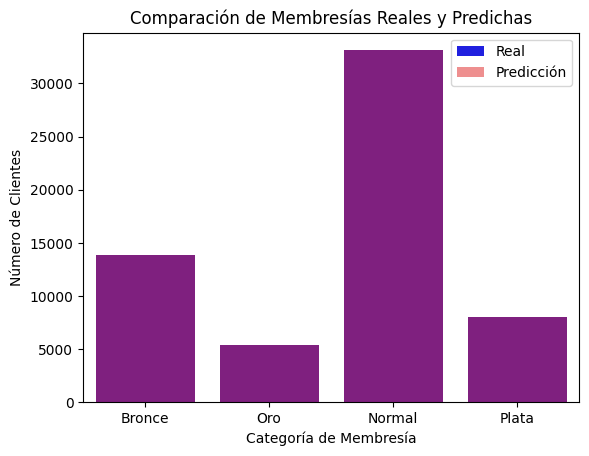

In [162]:
# Suponiendo que tienes algunos valores reales en 'data_nuevo'
# y_pred_nuevo son las predicciones de tu modelo

sns.countplot(x='categoria_membresia', data=data_encoded, color='blue', label='Real')
sns.countplot(x='categoria_membresia', data=data_original, color='red', alpha=0.5, label='Predicción')
plt.xlabel('Categoría de Membresía')
plt.ylabel('Número de Clientes')
plt.title('Comparación de Membresías Reales y Predichas')
plt.legend()
plt.show()
